# Comparing Each Decade's Number One Singles: Data Exploration
## Background

From the _List of Billboard number-one singles_ Wikipedia [page](https://en.wikipedia.org/wiki/List_of_Billboard_number-one_singles): 
>The following year-by-year, week-by-week listings are based on statistics accrued by Billboard magazine before and after the inception of its Hot 100 popularity chart in August 1958.
All data is pooled from record purchases and radio/jukebox play within the United States. Later charts also include digital single sales, online streaming, and YouTube hits.

### How Does a song become number one?
From Spliter in 2015: 
1. __The song has to be good (and accessible):__ 
<blockquote>
The first step to snagging a number one song is, well, writing and producing a really good song...Making a "good" number one song is not necessarily the same as making a "good" song in general. It's not about artistry (though sometimes artistry does hit number one). It's about popularity. And not long-term popularity. But popularity right here, right now.
</blockquote>  

2. __Every week counts independently__:
<blockquote>  
<p>The Billboard Hot 100 chart is calculated on a weekly basis. For a long time, the Billboard charts counted from Monday to Sunday as a standard week. But starting in July 2015, when new music began to standardly come out on Fridays, Billboard has been tracking a single week from Friday to Thursday. At the end of the week, your numbers reset. (And we find out what the number one song is every Tuesday. Are you keeping up?) So there's a huge benefit to releasing song or album on the standard release day (Friday); it helps to take advantage of the way the system counts sales. Release day matters a lot, for the Hot 200 albums chart as well, not just for singles.</p>
    
    <p>To be clear, this doesn't mean that your only chance to have a number one single is immediately after it comes out. Some songs peak much later. We call those "sleeper hits"—songs like Iggy Azalea's "Fancy," for example. A song can peak because of a really great music video, or its inclusion in something else popular (like a movie trailer). For example, N.W.A. finally snagged their first top 40 hit in the wake of the release of the movie Straight Outta Compton almost 30 years after its release.</p>

    But every week on Friday, the counter clocks reset, and a song has to prove itself the best in the country all over again.
</blockquote>

3. __The first factor in number one calculations: sales__:
<blockquote>  
<p>The number of albums sold is determined by Nielsen Soundscan, a service that monitors how many albums an artist sells both digitally and physically. According to Nielsen's site, the organization compiles data from more than 39,000 retail outlets globally every week, and then reports the findings to Billboard to use in a specially concocted ratio to pick the Top 100.</p>
    
    <p>In the calculations for number one, sales only play a small role. According to Billboard, sales make up somewhere between 35-45% of the ratio that determines how well a song does on the charts. But if a single has massive sale numbers, that alone could bump it into the Top 40.</p>
    
    <p>In February 2005, Billboard began to include digital sales of albums from digital retailers like iTunes and Rhapsody. In 2007, the system evolved to include streaming songs from platforms like Yahoo Music and AOL Music. Since then, the charts have been brought up to date by including platforms like Spotify and Apple Music, in addition to views from YouTube—with one video play counting as a song play. Ultimately, though, streaming only makes up a small fraction (20-30%) of the formula used to determine the ranking of songs in America.</p>
</blockquote>

4. __What matters more than streaming? Radio__:
<blockquote>  
<p>It's tempting to discount radio as something that only olds listen to. Who doesn't just make Spotify playlists or listen to the "radio" on Pandora—one that's specifically curated for them? Turns out, almost everyone. Radio has, for decades, been the most stable part of the music industry in terms of maintaining listeners.</p>
    
    <p>According to a 2013 Pew Research Center report on audio listening in the US, almost 92% of the listening public listens to AM/FM radio. That percentage hasn't changed much over the last 10 years, even with the advent of the internet. The biggest AM/FM radio company in America, iHeart Radio, says people tune in to the radio eight times per day. According to the Pew Research Center, people spend more time listening to the radio than they do surfing the internet. And radio plays take care of the rest of the counting ratio with 30-40%.</p>
    
Getting into the Top 40 might take luck, but getting the number one song in America takes more than that—it takes a precise confluence of every form of viral behavior all at once. People have to buy the song, they have to hear it on the radio and watch the video on YouTube. It has to, simply, be a hit.
</blockquote>





[Source](https://en.wikipedia.org/wiki/List_of_Billboard_number-one_singles)   



## Goals
Explore the data, answer preliminary questions.

### Preliminary Questions

1. Of all songs that went number one since 1950, are there any commonalities between the songs? Like tempo, valence, etc. ?
2. Is there any cyclical patterns? For example, popular songs today sound very disco-like from the 70s and very synth-like from the 80s. 

3. Are genres consistent among number ones? Do all songs have similar genres?
4. Are songs that go number one sung more by women or men? Solo acts or ensembles/groups?

These questions are just a starting point to guide this analysis. I'll describe further questions as I go.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols 
import scipy.stats as stats

songs = pd.read_csv("../data/processed/final_dataset_year.csv", index_col=0)
songs.shape

(1188, 20)

A question that came to mind was which decade had the most number one hits?

### Which decade had the most number one hits?

In [2]:
songs['decade'].value_counts()

1970    253
1980    231
1960    203
1990    140
2000    129
2010    116
1950    116
Name: decade, dtype: int64

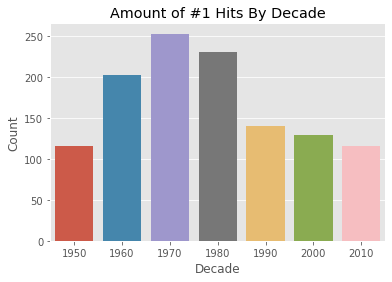

In [3]:
sns.countplot(x = 'decade', data=songs)

plt.xlabel('Decade')
plt.ylabel('Count')
plt.title("Amount of #1 Hits By Decade")
plt.show()

It looks like the 1970s had the most number one hits, but the 80s and the 60s are not too far behind. Interestingly, the most recent decade, the 2010s, has the least number one hits, tied with th 1950s.

From the histogram, we see that the amount of number one's per decade actually decrease after the 80s.

### NME: The number of unique Number One singles is decreasing.
<blockquote>In the ‘70s, the average number of Number Ones could be as high as 30 per year.In the past four years we haven’t had more than 13 unique Number Ones per year. As BBC Radio 1 boss Chris Price explained to NME last year, the stagnancy of the chart is probably down to streaming being counted in the charts:
    
“We’ve moved away from somebody walking into HMV and being a physical single, or downloading a 99p download from iTunes, and we’re moving much more towards measuring engagement over time. It’s less like somebody walking into a shop and making a purchase, and more like somebody sitting at home in their bedroom and listening to something several times over.”

[Source](https://www.nme.com/blogs/nme-blogs/billboard-100-shorter-explicit-2054269)  
</blockquote>

I'm curious to see if we can pinpoint a specific year for this drop in number one hits.

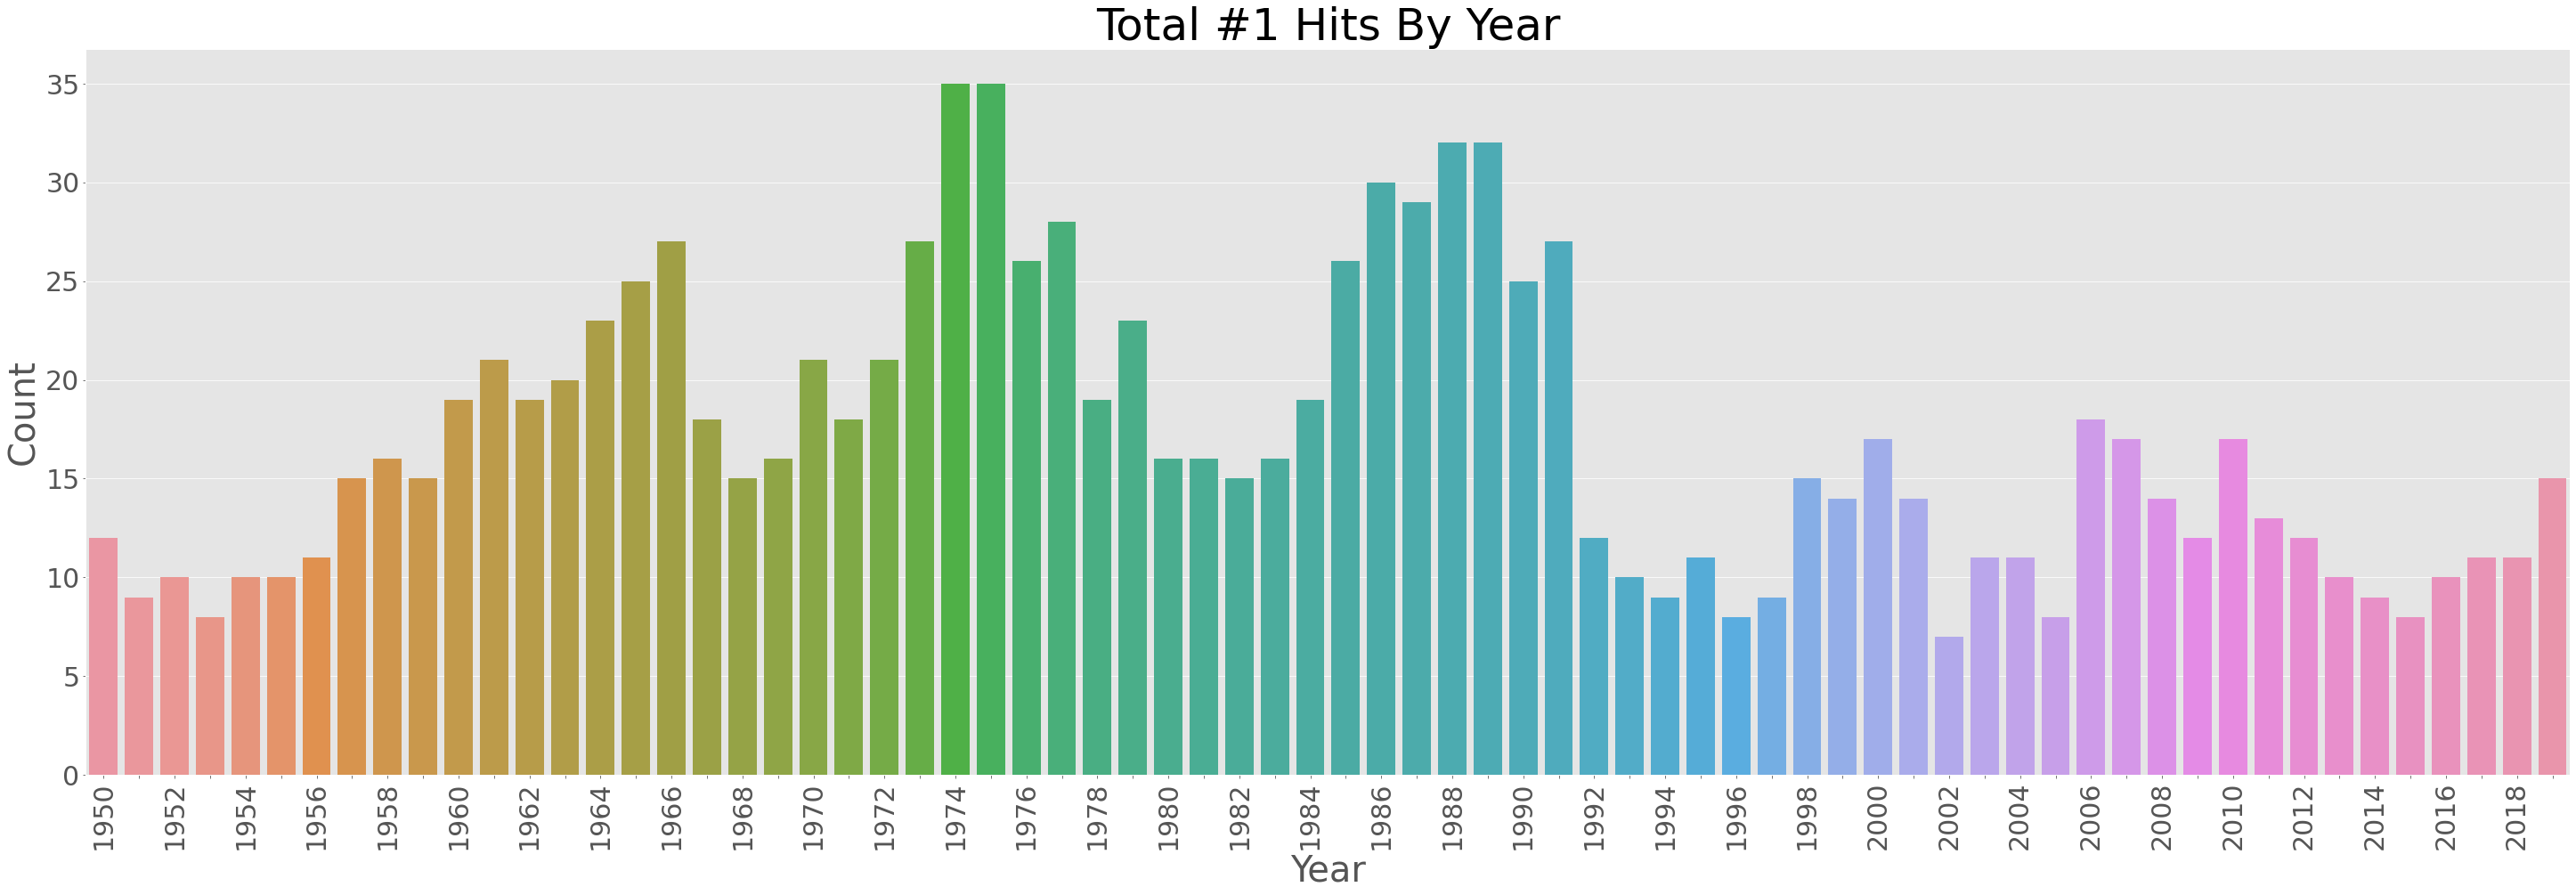

In [4]:
fig, ax = plt.subplots(figsize=(50,15))
sns.countplot(x='year', data=songs)

e = 2
for n,label in enumerate(ax.xaxis.get_ticklabels()):
    if n%e !=0:
        label.set_visible(False)

plt.xlabel('Year', fontsize=40)
plt.ylabel('Count', fontsize=40)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.title("Total #1 Hits By Year", fontsize=50)
plt.show()

This is actually very interesting! We see 3 major peaks in the amount of number ones per year. The first peak in the mid 60s, the mid 70s, and a persistent peak that started in the mid 80s and lasted through the early 90s. There are some smaller peaks from 1998-2001 and 2006-2010. After 2010, we can see a return to early 1950s numbers.

### Who has had the most number one hits since 1950?

I'll look at the top 10 acts with the most number one hits. I'll refer to these acts as __top hit makers__ from here on out.

In [5]:
songs['artist_name'].value_counts()[:12]

The Beatles        20
Mariah Carey       19
Elvis Presley      17
Michael Jackson    12
Madonna            12
Whitney Houston    11
Rihanna            11
The Supremes       10
Janet Jackson      10
Bee Gees            9
Katy Perry          9
Usher               9
Name: artist_name, dtype: int64

__Note:__
I've included the top 12 since the Bee Gees, Katy Perry, and Usher are tied with 9 hits.

The Beatles have had the most number one hits, while Mariah Carey trails them by just one song, and Elvis by 3. A quick Google search verifies this finding.

Looking closer at these __top hit makers__, 58.3% of them are female and 41.6% are male. Three of these acts are groups/ensembles, the rest are solo acts.

Off the top of my head, I know The Beatles were active in the 60s but broke up in the 70s. Another quick search tells me that The Beatles were actually together for 8 years. Mariah Carey has been making music since the 90s. I want to take a closer look at this.

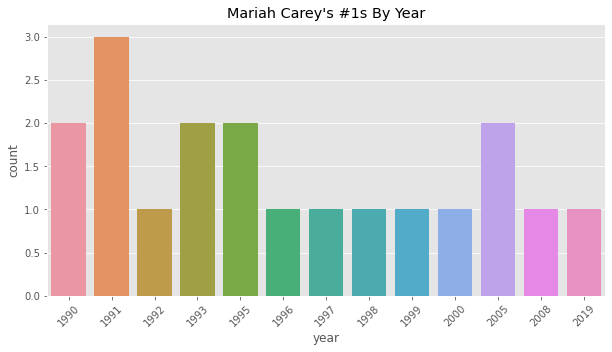

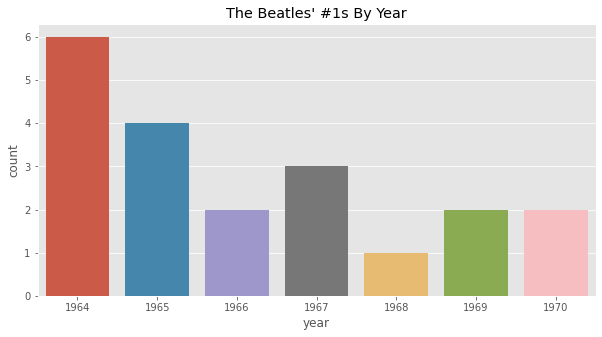

In [6]:
# Mariah Carey's data
fig, ax = plt.subplots(figsize=(10,5))
data = songs[songs['artist_name'] == "Mariah Carey"]['year']
sns.countplot(data)

labels = list(range(data.values.min(),data.values.max()+1))
plt.xticks(rotation=45)
plt.title("Mariah Carey's #1s By Year")
plt.show()

# The Beatles' data
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(songs[songs['artist_name'] == "The Beatles"]['year'])

plt.title("The Beatles' #1s By Year")
plt.show()

The above plot shows that The Beatles have had at least one hit from 1964-70 (in the US). Mariah Carey had a majority of her number ones between 1990 and 2000, with her four most recent number ones in and after 2005. So, it has taken Mariah Carey an extra two decades to come close to The Beatles' record as __top hit maker__, given that we ignore other factors that may be at play as seen in _Amount of #1 Hits By Year_ plot.

I wonder how long it has taken the other __top hit makers__ to accumulate the number of hits they made to get them into the list of __top hit makers__.

### How long did it take each artist to become a Top Hit Maker? How many decades do their hits span?
First I'll look at how many decades each artist's hits span.

In [7]:
top_12_artists = list(songs['artist_name'].value_counts()[:12].index)

for artist in top_12_artists:
    num_hits = len(songs[songs['artist_name'] == artist])
    decades = songs[songs['artist_name'] == artist]['decade'].unique()
    l = len(decades)
    
    print(f"{artist} had {num_hits} number ones throughout {l} decade(s), including: {decades} \n")

The Beatles had 20 number ones throughout 2 decade(s), including: [1960 1970] 

Mariah Carey had 19 number ones throughout 3 decade(s), including: [1990 2000 2010] 

Elvis Presley had 17 number ones throughout 2 decade(s), including: [1950 1960] 

Michael Jackson had 12 number ones throughout 3 decade(s), including: [1970 1980 1990] 

Madonna had 12 number ones throughout 3 decade(s), including: [1980 1990 2000] 

Whitney Houston had 11 number ones throughout 2 decade(s), including: [1980 1990] 

Rihanna had 11 number ones throughout 2 decade(s), including: [2000 2010] 

The Supremes had 10 number ones throughout 1 decade(s), including: [1960] 

Janet Jackson had 10 number ones throughout 3 decade(s), including: [1980 1990 2000] 

Bee Gees had 9 number ones throughout 1 decade(s), including: [1970] 

Katy Perry had 9 number ones throughout 2 decade(s), including: [2000 2010] 

Usher had 9 number ones throughout 3 decade(s), including: [1990 2000 2010] 



The average __top hit maker__ has hits that span at least two decades. I'll take a closer look at the year by year distribution of each artist's hits, including years they didn't have songs that reached number one. This will tell me how long it took each artist to become a __top hit maker__.

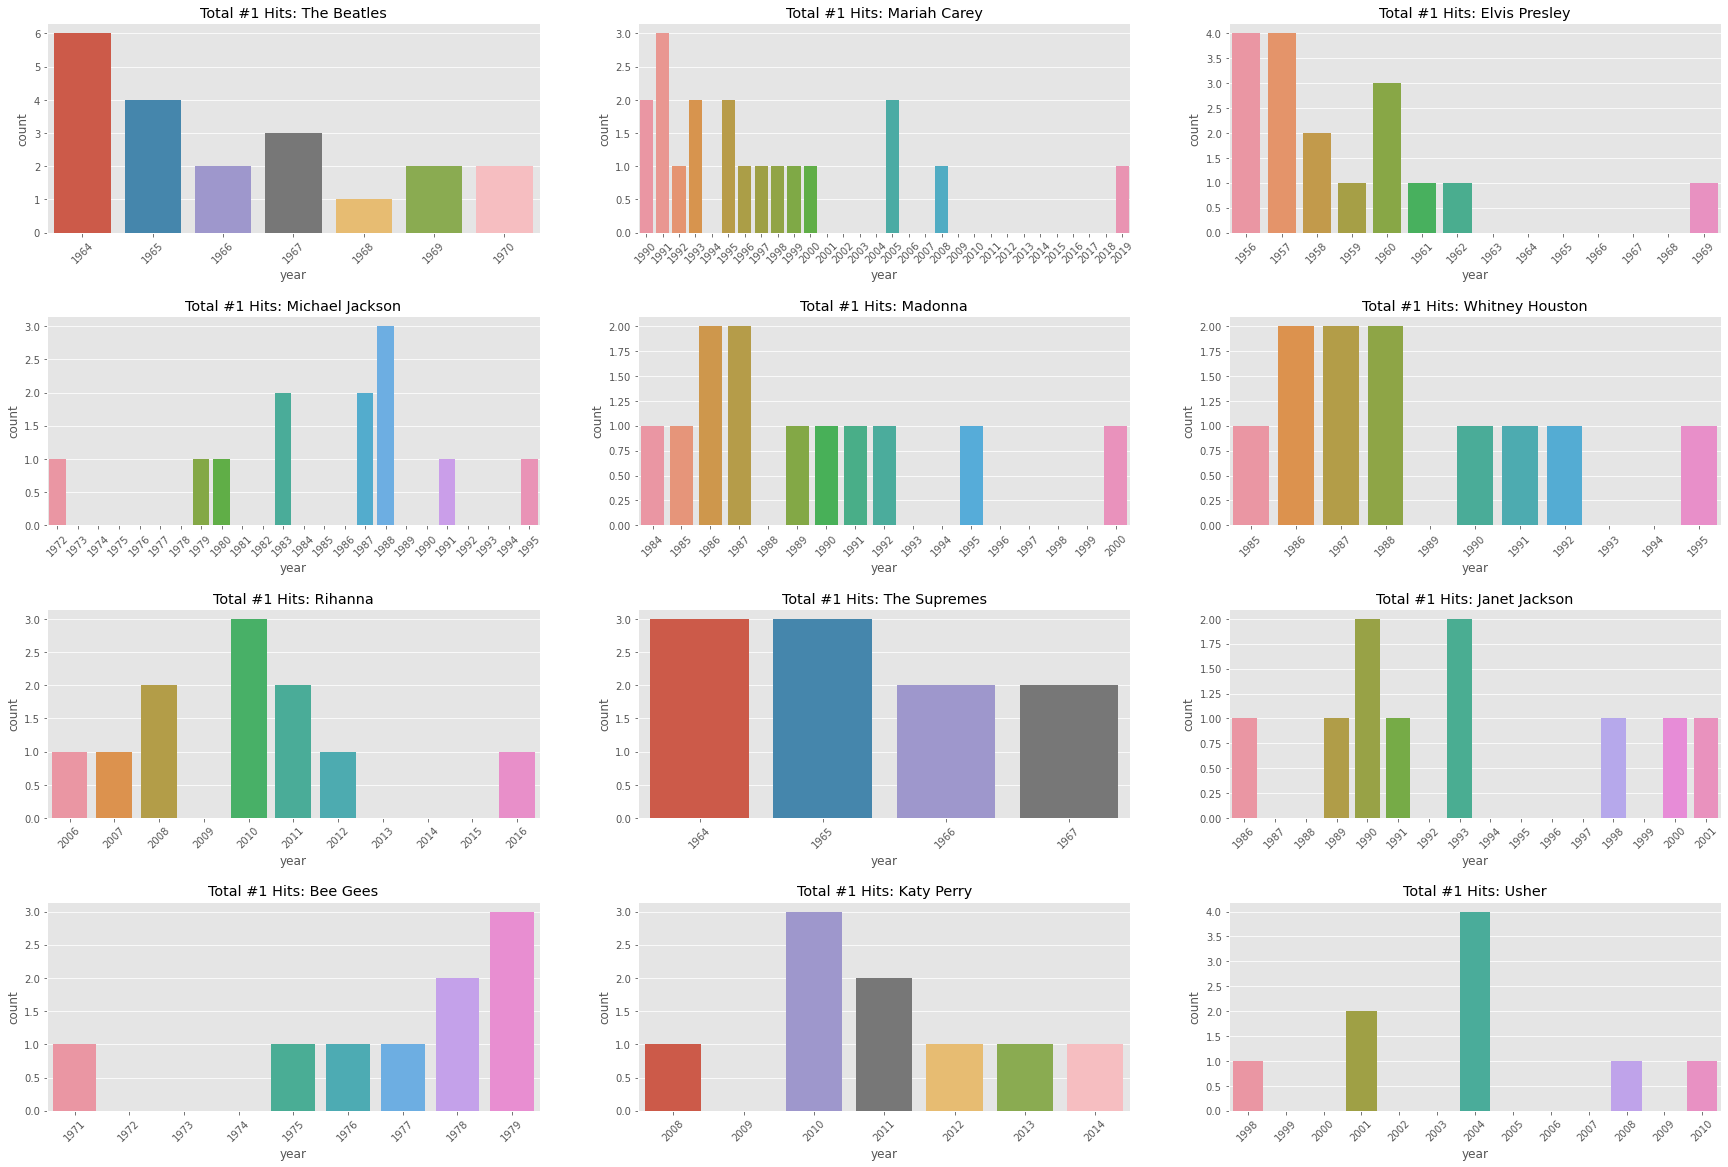

In [17]:
fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for i in range(1, 13):
    ax = fig.add_subplot(4, 3, i)
    artist = top_12_artists[i-1]

    data = songs[songs['artist_name'] == artist]['year']
    labels = list(range(data.values.min(),data.values.max()+1))
    ax.set_title(f"Total #1 Hits: {artist}")
    ax.set_xticklabels(labels, rotation=45)
    sns.countplot(data, order=labels )

From these plots, I can tell a few things. One being each artist's most productive years, as shown by the year(s) they had multiple number one hits. I'm tempted to label these productive years as __the year each artist peaked in their careers__. However, __music is subjective__, and in my opinion, having several number one hits does not indicate music quality or maturity of an artist. I'll refer to these peaks as each artist's __peak commercial success__.

I'll use Kesha as an example:

In [9]:
for i, row in songs[songs['artist_name'] == "Kesha"].iterrows():
    print(f" '{row['track_name']}', {row['artist_name']}, {row['year']}")

 'TiK ToK', Kesha, 2010
 'We R Who We R', Kesha, 2010


Kesha has had 2 number one's as a lead artist, and was a featured artist on two other songs that went #1 in 2009 and 2014. If we were to use most productive years as an indicator of peak career, we would say Kesha peaked in 2010. However, her third studio album, _Rainbow_ went number one in the US in 2017, seven years after her supposed "peak". I'll note though that none of the songs from _Rainbow_ went number one, despite being her highest rated album according to Metacritic. Additionally, her second album, _Cannibal_ , did not reach number one despite containing her second number one hit, "We R Who We R". So we can classify 2010 as the year Kesha reached her __commercial peak__ but not her artistic peak.

It's interesting to note from the above plots, the amount of time it took each artist to accumulate enough hits to make them a __top hit maker__.

The Supremes managed to get 10 number one hits in a span of 4 years, the shortest career of the top hit makers. The Supremes are tied with Janet Jackson for the 6th spot in the list of __top hit makers__. Janet Jackson also has 10 number one hits, but accumulated them over 16 years, an extra 12 years than it took The Supremes.

However, there are a lot of factors at play here. An artist's personal life, band/group dynamics, desires of music executives, and the competitiveness of the music industry, to name the most obvious ones. 

For instance, we see that __top hit makers__ from the 1960s, The Beatles and The Supremes, had relatively short careers compared with more modern acts after the 70s. They also tended to have number one hits every year following their first US number one until eventually breaking up. 
Elvis is the exception, having number one hits throughout the 1950s, which make his career much longer. Elvis also experienced a lack of number one hits after 1962, until his comeback in 1969. This gap in number one hits can be attributed to Elvis's manager pushing him into making films after returning from military service in 1960. His post-1962 films ultimately hurt his career and reputation as a serious musician. Elvis's 1969 hit, "Suspicious Minds", marked his comeback but was the last song that would reach number one.

Upon looking at the other __top hit makers__, we see similar gaps where there are years an artist had no number one hits. Interestingly, Mariah Carey has the longest gap between number one hits; there are 11 years between 2008's "Touch My Body" and her 1994 hit "All I Want for Christmas Is You" going number one in 2019.

### Is there any commonalities between songs that went number one such as a high valence or tempo?

Now I'll take a step back from looking into artists individually and look at song features. First I'll look at how each feature in the whole dataset in distributed before filtering by decade.

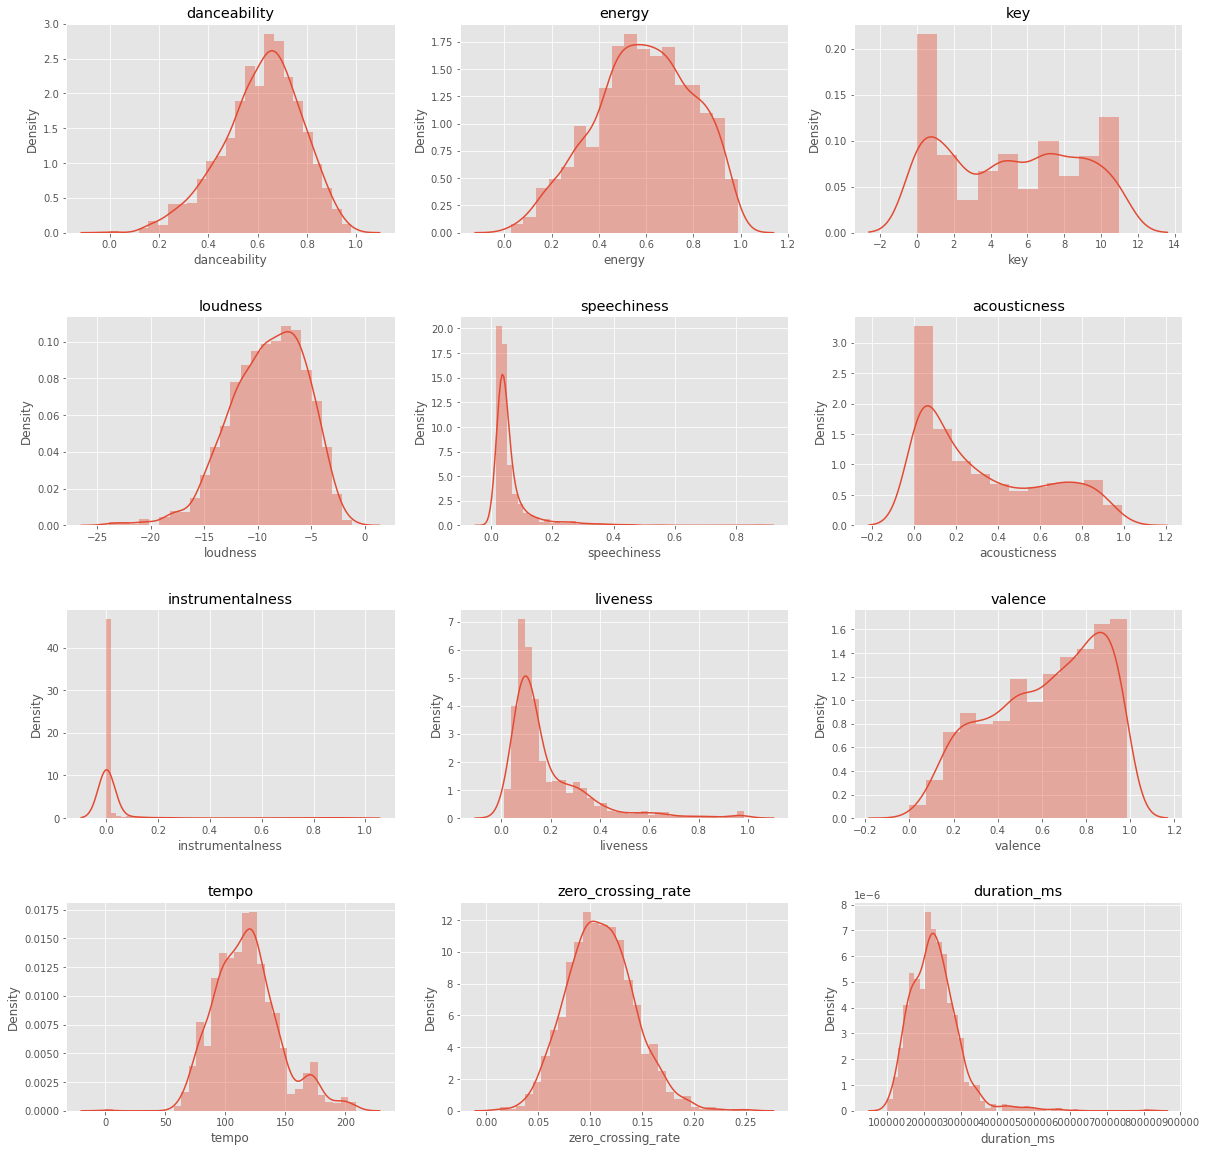

In [10]:
cols = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
        'liveness', 'valence', 'tempo', 'zero_crossing_rate', 'duration_ms']

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for i in range(1, 13):
    ax = fig.add_subplot(4, 3, i)
    feature = cols[i-1]

    sns.distplot(songs[cols[i-1]])
    ax.set_title(cols[i-1])

Danceability, energy, loudness, and tempo all appear to be slightly left skewed. Speechiness, instrumentalness, liveness, and duration are all heavily right-skewed, but this is to be expected based on what these features represent. Valence and acousticness are most interesting in my opinion. I expected acousticness to be distributed similarly to instrumentalness, but it doesn't seem to be as skewed. Valence also has an interesting distribution. I expected the distribution to be left-skewed, since valence here means how positive or happy a song sounds, and hit songs tend to be pretty upbeat unless they're ballads. However, I expected this distribution to resemble the danceability distribution, centered around 0.7-0.9.

Before I move on, I'll generate a correlation heatmap of the features to get a better idea of how these features are related, if at all.

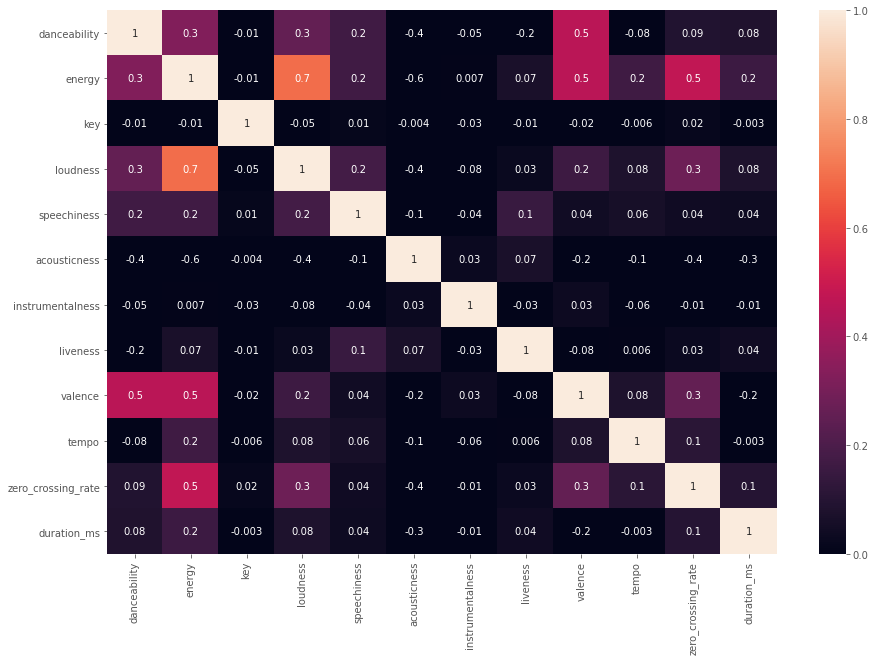

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
corr = songs[cols].corr()
sns.heatmap(corr, annot=True, fmt='.1g',vmin=0, vmax=1)
plt.show()

The most important insights I get from this plot is that danceability is correlated with valence, which makes sense. A song that's danceable would most likely song very upbeat and happy. Energy and loudness is also moderately correlated with danceability; they are also highly correlated to each other.

Now I'll group the songs by decade and plot the mean values of each feature to get an idea of how each of these features changed by decade. 

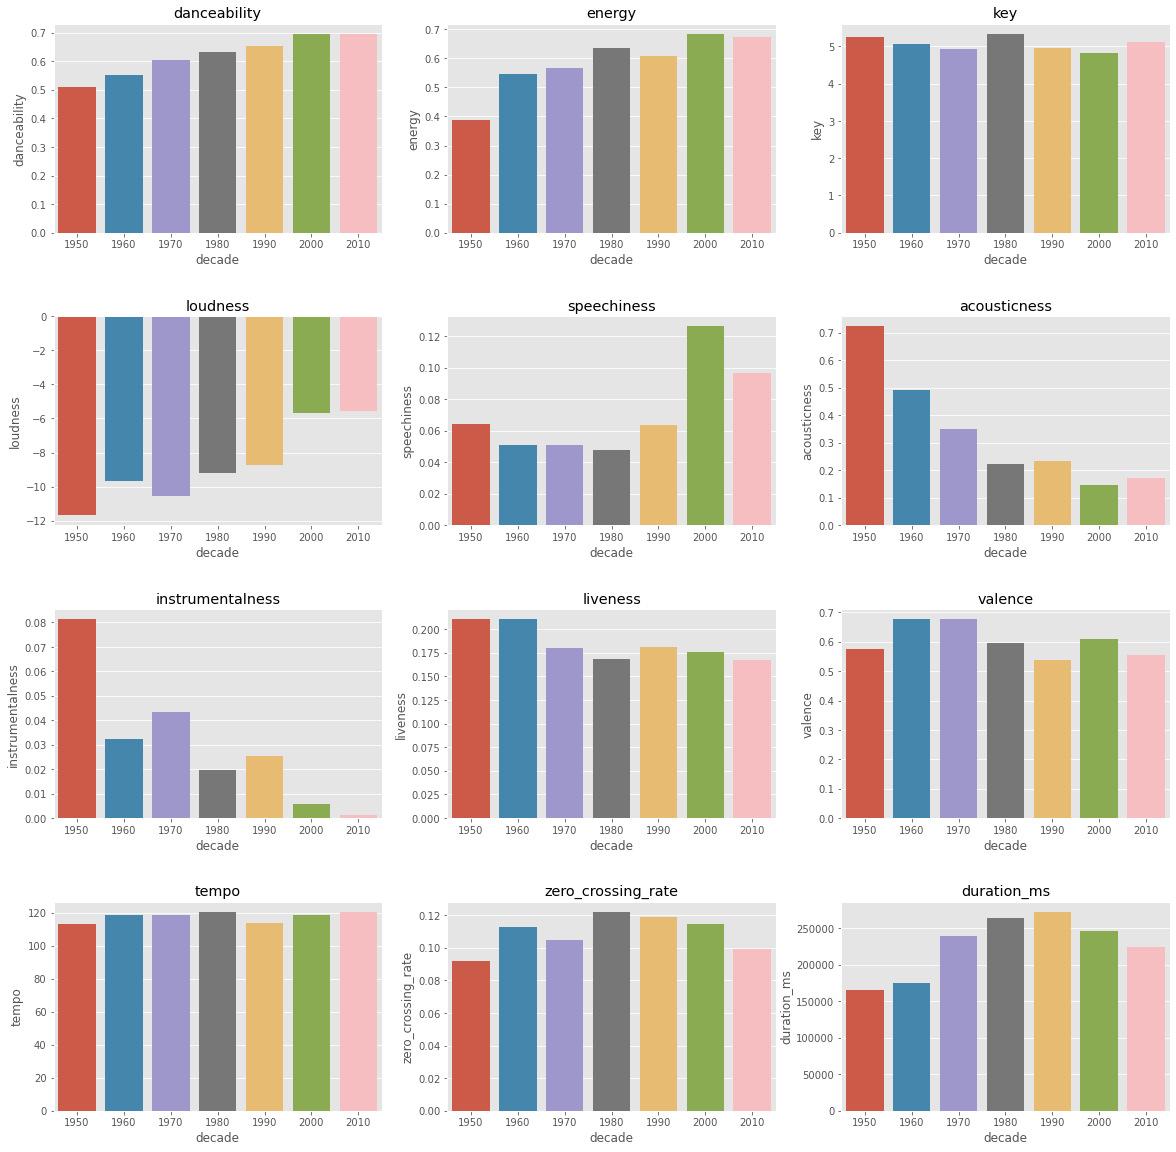

In [12]:
decade_grouped = songs.groupby(['decade']).mean().reset_index()

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1, 13):
    ax = fig.add_subplot(4, 3, i)
    feature = cols[i-1]

    sns.barplot(x='decade', y=cols[i-1], data=decade_grouped)
    ax.set_title(cols[i-1])

There are a lot of interesting trends here. Typically, number one hits have a `danceabilty` score above 0.5. There's been a slight increasing trend since the 1950s of songs becoming more danceable as the decades have gone on. We see a similar trend with `energy`. 

Songs in the 1950s were generally low `energy`, highly `instrumental`, and highly `acoustic`, at least before 1955 when the first rock and roll song went number one, "Rock Around The Clock". Several artists of the early 1950s were accompanied by orchestras, some songs were even solely instrumental. The latter half of the decade sees the rise of doo-wop, an early genre of R&B, which was more vocal and incorporated little to no instrumentals. Doo-wop as a genre typically characterizes the musical style of this decade.

Another interesting trend is the dramatic increase of `speechiness` in the 2000s compared to the 1990s. I imagine this can be attributed to the rising popularity of rap/hip-hop songs in the 90s, then the explosion of these two genres in the 2000s.

`Tempo` appears pretty steady throughout the decades, which is interesting because I would expect songs to become faster. `Valence` stays around the same levels as well. Looking at song `duration`, I see that songs in the 1950s were much shorter, with songs getting progressively longer through the 90s, and eventually decreaseing again.

`Loudness` appears to become less negative, which I imagine means songs are getting louder as time goes on. This makes sense since `loudness` was highly correlated with `energy`, which also increases with the decades.

Just out of curiosity, I'll plot the yearly mean for each feature.

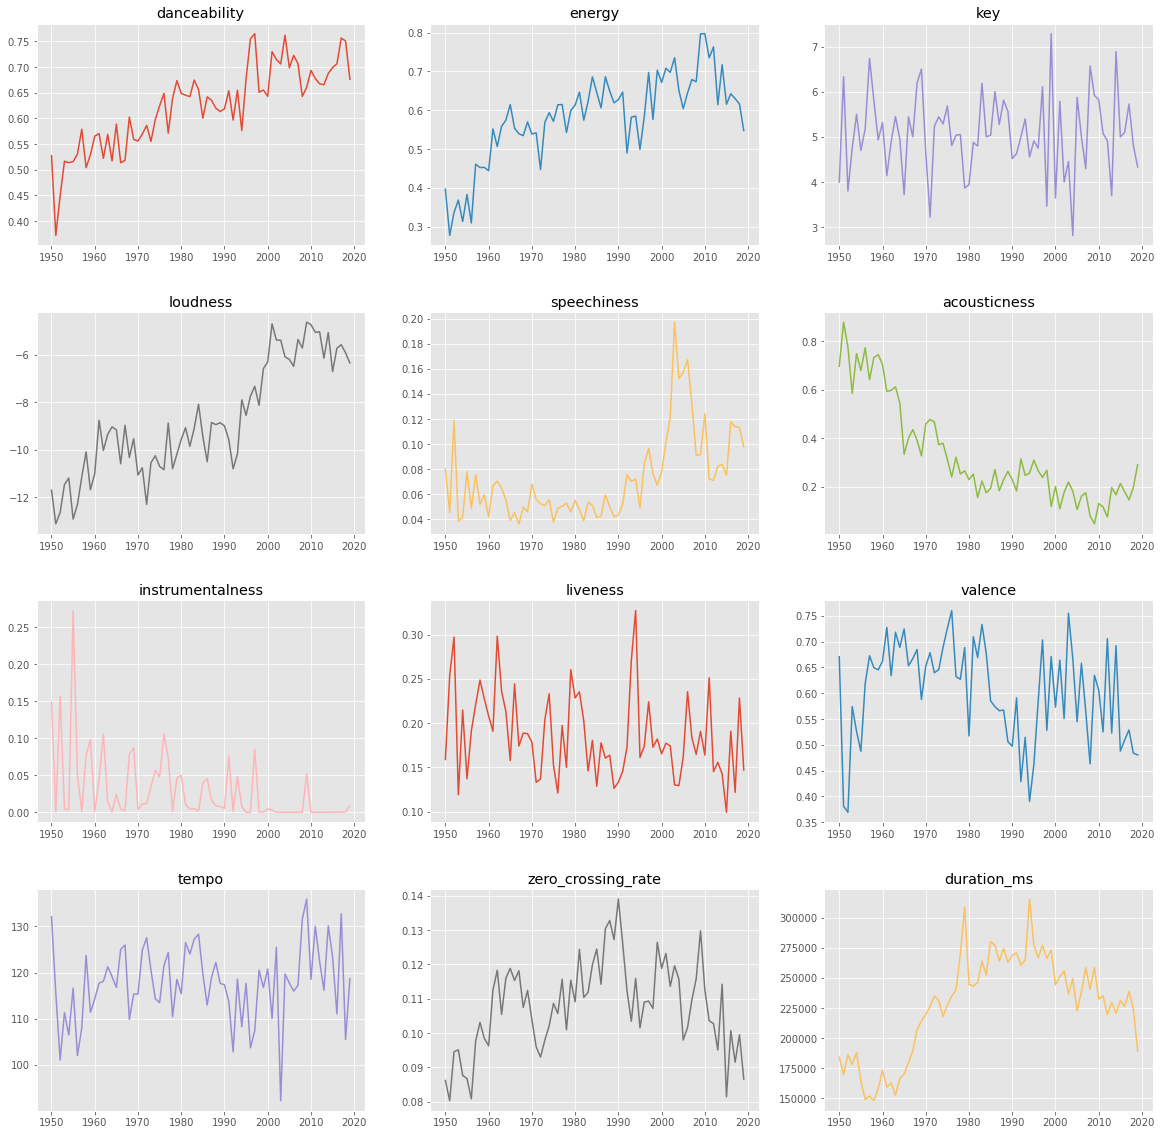

In [13]:
year_grouped = songs.groupby(['year']).mean().reset_index()
plt.style.use('ggplot')

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors.extend(colors)

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i,c in zip(range(1, 13), colors):
    ax = fig.add_subplot(4, 3, i)
    feature = cols[i-1]

    plt.plot(year_grouped['year'], year_grouped[cols[i-1]], color=c)
    ax.set_title(cols[i-1])

These plots verify several of the patterns seen in the decadal plots. I can also see some of the more fine-grained patterns here, especially in the valence plot. In the decadal plots, `valence` looked fairly uniform throughout the decades, but here we can see several drops in the mean `valence` in the early 50s, and then again in the mid 80s until the mid 90s.

### Are genres consistent across decades?
Answering this question is going to be tricky, especially since the older songs may be labeled as "standards" or "oldies".

In [14]:
for decade in songs['decade'].unique():
    df = songs[songs['decade'] == decade]
    print(decade)
    print(df['genres'].value_counts()[:5])
    print("\n")  

1950
pop                                                              13
['rock-and-roll', 'rockabilly']                                  12
['adult standards', 'easy listening', 'lounge', 'vocal jazz']     5
country                                                           5
vocal                                                             5
Name: genres, dtype: int64


1960
rock                                                                                                       35
r&b/soul                                                                                                   23
pop                                                                                                        21
['rock-and-roll', 'rockabilly']                                                                             6
['adult standards', 'brill building pop', 'bubblegum pop', 'easy listening', 'lounge', 'rock-and-roll']     4
Name: genres, dtype: int64


1970
pop           40
r&b/soul      30
roc

Luckily this wasn't as precarious as I thought it would be.
#### 1950s
The 1950s was characterized by rock and roll, which became very popular during this decade. I see a genre referred to as __easy listening__. A quick search tells me that easy listening music is the type of music that preceded rock and roll, is melodic, accompanied by string instruments.

From Wikipedia:
>Easy listening music featured popular vocalists such as Perry Como, Frank Sinatra, Bing Crosby, Dean Martin, Tony Bennett, Dionne Warwick, Bill Kenny, Astrud Gilberto, Matt Monro, The Carpenters and many others.

[Source](https://en.wikipedia.org/wiki/Easy_listening)

This makes sense considering what I saw in the feature distributions. The genres __vocal__ and __country__ also make sense for this era of music. Pop music during this era is anything else that isn't considered rock-and-roll.

#### 1960s
In this decade we can see that __rock__ and __r&b/soul__ overtook pop as the most popular genre. We see the beginnings of rock with the introduction of The Beatles, The Beach Boys, The Rolling Stones, and The Mamas & The Papas. The rise of r&b can be attributed with the wildly successful artists and groups coming from __Motown__. Pop music here is again, anything that isn't rock. It can be characterized as the vocal and doo-wop songs that became popular at the end of the 50s.

#### 1970s
With the 70s, pop music begins to encompass several genres and acts from artists of the previous decades, as opposed to previous decades where the pop genre was much less diverse. I imagine this is why __pop__ becomes the most common genre among number ones in this decade. In the 70s, rock (George Harrison, Linda Ronstadt), r&b (Marvin Gaye) and several __disco__ artists (BeeGees, ABBA) make up the pop genre. This decade also sees the advent and rise of disco, and an explosion of rock music influenced by the rock artists of the decade prior. The Motown acts also start incorporating more disco elements into their genre and make, in my opinion, some of the most influential music of all time.

#### 1980s
In the 1980s, we see the end of __disco__ and a decline in r&b. As in the 60s, we see __rock__ overtake __pop__ as the most popular genre for number one songs. The genres that are popular in the 80s are very similar to genres of the previous decades, but the sounds that make up these genres starts to become more diverse. The rock genre also becomes more diverse, incorporating great rock artists of the previous decades (Paul McCartney, Queen, Boston, Heart) with newer artists and sounds from bands such as Bon Jovi and Billy Idol. This decade launches the careers of several more modern artists that would go on to still be making music today, 40 years later. We see the launch of Michael Jackson's solo career. __Dance pop__ also becomes very popular in this decade with the introduction of a more electronic sound that comes to mind when thinking about the 80s. The 80s also gifts us with some great __one-hit-wonders__ such as "Come On Eileen", "Africa" and "Hey Mickey".

#### 1990s
Dance pop continues to be popular into the 90s, and pop music becomes the top genre of this decade. This decade is exciting because __hip-hop__ and __rap__ start to become popularized and songs from this genre start to reach number one, even though the first popular rap song, Rapper's Delight, charted in 1979 but did not go number one. Interestingly, rock is in heavy decline during this decade. Only 4 rock songs went number one, and they were all at the beginning of the decade.

#### 2000s
If the 90s popularized hip-hop and rap music, then the 2000s is when this genre flourished. In this decade, hip-hop/rap was the most popular genre, having at least 32 songs go number one. Dance pop starts to decline in this decade. Pop again is the second most popular genre. The decline of rock music continues, in the 2000s only one song goes number one.

#### 2010s
Pop once again becomes the most popular genre, however, as stated before, it encompasses several different genres and references music that is popular. Hip-hop and rap continue to be popular and dance pop starts to rise again. As rock declined in the previous decades, a new subgenre of rock rises in the 2010s, alternative rock.

__Overview:__
Genres in the 2000s and 2010s start to become blurred as pop music becomes more diverse and music becomes more experimental. It appears that genres over the decades have changed as new and different styles are introduced and become popular. So while, for example, rock music was the top genre in the 60s, when it became the top genre again in the 80s, it sounded very different. For som perspective, The Beatles, The Rolling Stones, and The Beach Boys were the top rock groups of the 1960s, and in the 80s, the top rock groups were Bon Jovi, Paul McCartney, and Huey Lewis & The News.

So it's difficult to say whether a genre has really "endured" through the decades, but we can definitely see which genres were popular during these times and how they've changed.

## Statstical Testing
Another question that came to mind is: is there a statistically significant difference in the audio features between each decade? I'll look specifically at the following features:
* `danceability`
* `energy`
* `valence`

I'm looking at these three features because the differences among the barplots above are not as drastic.

### Is there a statistically significant difference in the danceability, energy, and the valence of number ones between each decade? 

#### ANOVA
First, I'll use ANOVA to compare the mean danceability for each decade. This will tell me if each decades means are equal or not:

$H_0$: Each decades mean danceability scores are equal; there is no variation in danceability between decades.

$H_A$: At least one decade's mean danceability is different from the other groups.

__ANOVA Assumptions__:
* Residuals are normally distributed
* Homogeneity of variances (variances are equal between groups)
* Observations are sampled independently from each other 


In [2]:
data = songs[['danceability','decade']]
data.head()

,danceability,decade
0,0.596,1950
1,0.270,1950
2,0.589,1950
3,0.725,1950
4,0.752,1950


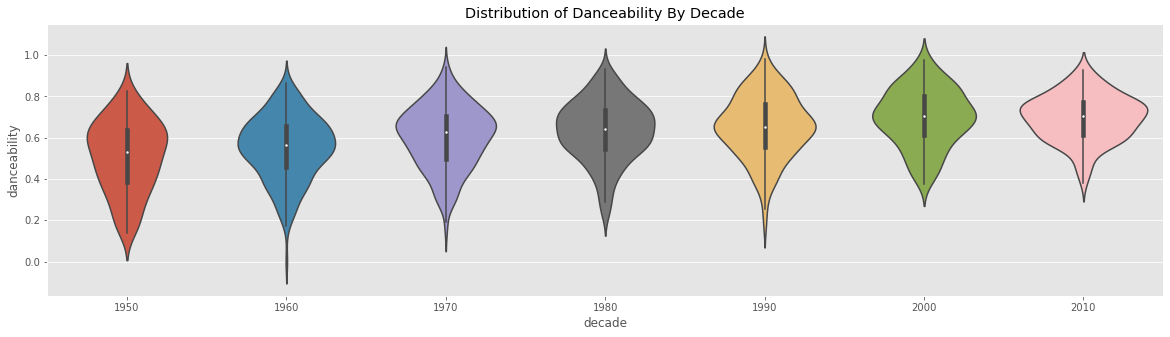

In [5]:
plt.figure(figsize=(20,5))
sns.violinplot(x='decade', y='danceability', data=data)
plt.title("Distribution of Danceability By Decade")
plt.show()

This looks pretty similar to the danceability barplot from above. Using violin plots shows the propability distribution for each decade, giving me better insight into what value each decade's danceability scores are centered around. 

I'll start with the statsmodels library and perform a one way anova test to determine whether there is a difference is danceability between the decades, or if they all have equal danceability scores. If the p-value is less that 0.05, we can reject the null and conclude that at least one decade has a different mean danceability from the other decades.

In [6]:
# using statsmodels
model = ols('danceability ~ C(decade)', data=data).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(decade),6.0,4.066037,0.677673,31.016183,9.882191e-35
Residual,1181.0,25.803678,0.021849,NaN,NaN


The resulting p-value from the table above is 9.88e-35, which is almost 0. This means I can reject the null hypothesis. But just to be sure, I'll use the scipy `f_oneway` function to see if I get the same result.

In [7]:
# using scipy
fvalue, pvalue = stats.f_oneway(data[data['decade']==1950], data[data['decade']==1960], data[data['decade']==1970],
                                     data[data['decade']==1980], data[data['decade']==1990], data[data['decade']==2000],
                                     data[data['decade']==2010])
print(pvalue)

[9.88219147e-35 0.00000000e+00]


I got the exact same result. This confirms that I can reject the null hypothesis and accept the alternative; at least one decade has a mean danceability different than the other decades. Now I'll need to determine which decade(s) are different. I'll use Tukey's HSD test to perform multiple pairwise comparisons.

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# split the data into two parts to avoid not getting sigificant results for
# > 20 comparisons
data_1 = data[data['decade'].isin(['1950','1960','1970','1980'])]
data_2 = data[data['decade'].isin(['1980','1990','2000','2010'])]

# perform multiple pairwise comparison (Tukey HSD) for part 1
m_comp = pairwise_tukeyhsd(endog=data_1['danceability'],groups=data_1['decade'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  1950   1960   0.0412 0.0962 -0.0047 0.0871  False
  1950   1970   0.0932  0.001  0.0489 0.1374   True
  1950   1980    0.124  0.001  0.0791 0.1688   True
  1960   1970   0.0519 0.0019  0.0148 0.0891   True
  1960   1980   0.0828  0.001  0.0448 0.1207   True
  1970   1980   0.0308 0.1212 -0.0051 0.0667  False
---------------------------------------------------


In [11]:
# perform multiple pairwise comparison (Tukey HSD) for part 2
m_comp = pairwise_tukeyhsd(endog=data_2['danceability'],groups=data_2['decade'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  1980   1990   0.0188 0.5819 -0.0198 0.0574  False
  1980   2000   0.0628  0.001  0.0231 0.1024   True
  1980   2010   0.0632  0.001  0.0222 0.1042   True
  1990   2000    0.044 0.0502    -0.0  0.088  False
  1990   2010   0.0444 0.0568 -0.0009 0.0897  False
  2000   2010   0.0004    0.9 -0.0457 0.0466  False
---------------------------------------------------


This result shows some very interesting patterns. It appears that most decades are not different from ones that come directly before or after. For example, the danceability of the 1950s is not different from the 1960s, but the one exception is that the 1960s is different from the 1970s.

I also see that when comparing decades, once another 10 years has passed, there is a significant difference. For example, the 1950s are significantly different than the 1970s and on. However, this effect is not seen in the 90s and on; the 90s is not different than the 2000s or the 2010s.

Now I'll check the assumptions of the ANOVA to make sure the findings are sound.

In [22]:
# testing for normality
stat, p = stats.shapiro(model.resid_pearson)
print(stat, p)

0.9889898300170898 8.761212910712857e-08


The null hypothesis of the Shapiro-Wilk test is that the data is drawn from a normal distribution. The result of running this test is a p-value that is very close to 0. So, I have to reject the null, and accept the alternative hypothesis: the data is not drawn from a normal distribution.

To be sure, I'll look at the QQ-plot and a histogram.

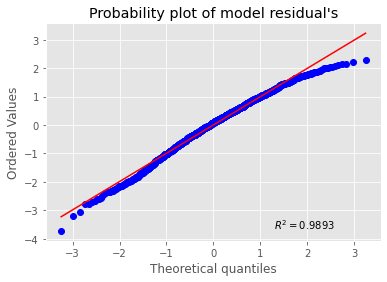

In [28]:
# QQ Plot
fig = plt.figure()
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid_pearson, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's")
ax.set

plt.show()

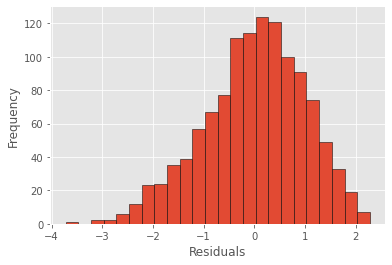

In [30]:
# histogram
plt.hist(model.resid_pearson, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

The plots above verify the Shapiro-Wilk test result. The data is left-skewed, thus it is not normal.

Now I'll run a Levene's test, which checks the homogeneity of variances when the data is not drawn from a normal distribution.

In [34]:
# homogeneity of variance

# method 1: Levene's test
lev_res = stats.levene(data[data['decade']==1950]['danceability'], 
                                data[data['decade']==1960]['danceability'], 
                                data[data['decade']==1970]['danceability'],
                                data[data['decade']==1980]['danceability'], 
                                data[data['decade']==1990]['danceability'], 
                                data[data['decade']==2000]['danceability'],
                                data[data['decade']==2010]['danceability'])

print(lev_res)
# method 2: Bartlett's 
bart_res = stats.bartlett(data[data['decade']==1950]['danceability'], 
                                data[data['decade']==1960]['danceability'], 
                                data[data['decade']==1970]['danceability'],
                                data[data['decade']==1980]['danceability'], 
                                data[data['decade']==1990]['danceability'], 
                                data[data['decade']==2000]['danceability'],
                                data[data['decade']==2010]['danceability'])
print(bart_res)

LeveneResult(statistic=3.547335686621939, pvalue=0.0017383957046680082)
BartlettResult(statistic=22.11905229943534, pvalue=0.0011521667188842011)


The p-value for both tests is less than 0.05, so I reject the null and conclude that the variances are not equal; there is a difference between the variances in the population.

This means that all the assumptions of the ANOVA analysis are violated. So, I cannot trust the results of my analysis. I have a few options on how to proceed: 

* Transform the data to have a normal distribution
* Use non-parametric tests
* Use alternative statistics for determining significance

I'll use the non-parametric tests in this case.

#### Non-Parametric Tests
The non-parametric version of ANOVA is the Kruskal-Wallis H-test. Similarly, this test can be used to determine whether more than two independent samples have different distributions. The null and alternative hypotheses are as follows:

$H_0$: All sample distributions are equal.
$H_A$: One or more sample distributions are not equal.

I'm still testing the danceability distributions for each decade.

In [3]:
from scipy.stats import kruskal

stat, p = kruskal(data[data['decade']==1950]['danceability'], 
                     data[data['decade']==1960]['danceability'], 
                     data[data['decade']==1970]['danceability'],
                     data[data['decade']==1980]['danceability'], 
                     data[data['decade']==1990]['danceability'], 
                     data[data['decade']==2000]['danceability'],
                     data[data['decade']==2010]['danceability'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=151.094, p=0.000
Different distributions (reject H0)


The resulting p-value is extremely close to 0, so I reject the null and conclude that at least one decade's danceability is significantly different from the others. 

Now I'll use Dunn's Test to perform pairwise significance tests.

In [6]:
!pip install scikit-posthocs

  Using cached scikit_posthocs-0.6.6-py3-none-any.whl (27 kB)


In [12]:
import scikit_posthocs as sp 
# performing Dunn's test with bonferroni correction
labels = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']
result_df = sp.posthoc_dunn([data[data['decade']==1950]['danceability'], 
                            data[data['decade']==1960]['danceability'], 
                            data[data['decade']==1970]['danceability'],
                            data[data['decade']==1980]['danceability'], 
                            data[data['decade']==1990]['danceability'], 
                            data[data['decade']==2000]['danceability'],
                            data[data['decade']==2010]['danceability']],
                            p_adjust='bonferroni')

result_df.columns = labels 
result_df.index = labels
result_df

,1950,1960,1970,1980,1990,2000,2010
1950,1.000000e+00,1.000000e+00,1.634882e-04,2.164563e-08,3.105014e-09,3.456213e-16,2.510371e-16
1960,1.000000e+00,1.000000e+00,1.219642e-02,1.568718e-06,2.367485e-07,1.110212e-14,9.208292e-15
1970,1.634882e-04,1.219642e-02,1.000000e+00,7.060446e-01,8.404546e-02,1.127889e-06,6.169084e-07
1980,2.164563e-08,1.568718e-06,7.060446e-01,1.000000e+00,1.000000e+00,6.835489e-03,3.499037e-03
1990,3.105014e-09,2.367485e-07,8.404546e-02,1.000000e+00,1.000000e+00,4.080902e-01,2.342830e-01
2000,3.456213e-16,1.110212e-14,1.127889e-06,6.835489e-03,4.080902e-01,1.000000e+00,1.000000e+00
2010,2.510371e-16,9.208292e-15,6.169084e-07,3.499037e-03,2.342830e-01,1.000000e+00,1.000000e+00


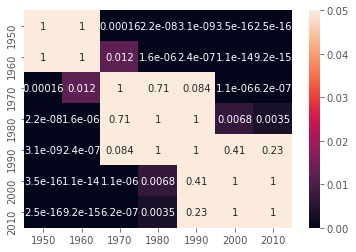

In [23]:
# heatmap of paired p-values
sns.heatmap(result_df, vmin=0, vmax=0.05, annot=True, cmap='rocket')
plt.show()

The heatmap above shows which decade pairs are significantly different, where the null hypothesis should be rejected. This would be any cells that are dark colored; all lighter cells represent p-values for relationships where I would fail to reject the null hypothesis.

I'll run similar tests for `energy` and `valence`.

Results for energy: 

Statistics=155.061, p=0.000
Different distributions (reject H0)


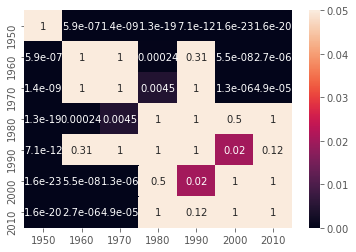



Results for valence: 

Statistics=51.270, p=0.000
Different distributions (reject H0)


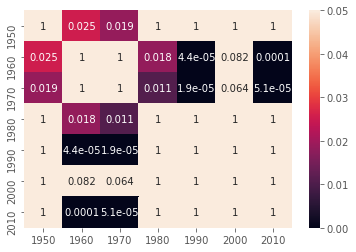

In [27]:
features = ['energy', 'valence']

for feature in features:
    data = songs[['decade',feature]]

    # Kruskal-Wallis test
    stat, p = kruskal(data[data['decade']==1950][feature], 
                     data[data['decade']==1960][feature], 
                     data[data['decade']==1970][feature],
                     data[data['decade']==1980][feature], 
                     data[data['decade']==1990][feature], 
                     data[data['decade']==2000][feature],
                     data[data['decade']==2010][feature])
    
    print(f"Results for {feature}:","\n")
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpretation
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
        pass
    else:
        print('Different distributions (reject H0)')
        
        # Dunn's test
        labels = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']
        result_df = sp.posthoc_dunn([data[data['decade']==1950][feature], 
                                    data[data['decade']==1960][feature], 
                                    data[data['decade']==1970][feature],
                                    data[data['decade']==1980][feature], 
                                    data[data['decade']==1990][feature], 
                                    data[data['decade']==2000][feature],
                                    data[data['decade']==2010][feature]],
                                    p_adjust='bonferroni')

        result_df.columns = labels 
        result_df.index = labels

        # heatmap of paired p-values
        sns.heatmap(result_df, vmin=0, vmax=0.05, annot=True, cmap='rocket')
        plt.show()

    print("\n")


#### Energy
From the heatmap above, energy in the 1950s is significantly different from all other decades. This is also verified by looking at the line plot; the mean energy in the 1950s is below 0.4, whereas the rest of the decades vary between 0.55 and 0.67. The later decades, 1980s and later, are not different from eachother, with the 1990s and 2000s being the exception. It is interesting to compare this to danceability, which I found was moderately (0.3) correlated with energy, and had some patterns emerge from its heatmap. Energy on the other hand, does not have obvious patterns except for energy being the most different between the 50s and 80s, and not significantly different between the 80s to present. Although, the energy between the 1990s and the 2000s does appear to be statistically different. This heatmap makes sense when thinking back to genre. The 1950s to the 1980s saw some drastic deviations in genre, whereas the more recent decades had several genres in common. I imagine the difference in energy between the 90s and 2000s is due to the popularization in rap music, which could be high energy in some cases.
#### Valence

## Conclusion


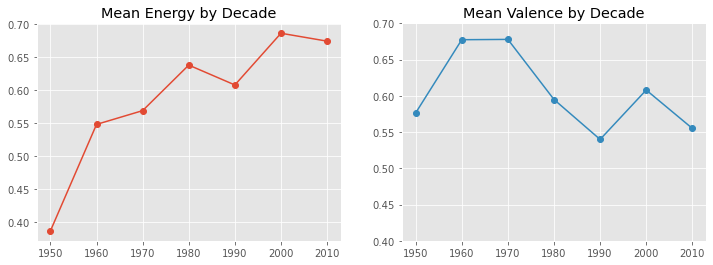

In [4]:
# get colors as a list
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors.extend(colors)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].plot(songs.groupby('decade').mean()['energy'], marker="o", c=colors[0])
axs[0].set_title("Mean Energy by Decade")

axs[1].plot(songs.groupby('decade').mean()['valence'], marker="o", c=colors[1])
axs[1].set_ylim((0.40,0.70))
axs[1].set_title("Mean Valence by Decade")

plt.show()